# Data Science in Drug Discovery

Data science plays a crucial role in the drug discovery process, offering innovative solutions to streamline the identification and analysis of potential drug candidates. By leveraging large datasets, such as those available from the ChEMBL database, researchers can utilize computational methods to predict drug efficacy, toxicity, and target interactions more efficiently than traditional experimental approaches.

## Preliminary Analysis Process of Drug Candidate Identification

The preliminary analysis process in drug discovery involves several key steps, including data collection, preprocessing, and analysis, often facilitated by Python due to its rich ecosystem of data science libraries. Below is an outline of how one might approach this process using Python and the ChEMBL database.

### Step 1: Accessing ChEMBL Database

The ChEMBL database is a rich source of bioactive molecules with drug-like properties. Accessing this database can be done through its web services API.

```python
from chembl_webresource_client.new_client import new_client

# Initialize a new client for accessing the ChEMBL database
molecule = new_client.molecule

In [1]:
! pip install chembl_webresource_client


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 9.0 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [3]:
# This code block is designed to search for a specific target, "Human DiHydroOrotate DeHydrogenase", in the ChEMBL database.
# It uses the `new_client.target` to access the target data from ChEMBL.
# The `search` method is then used to find information related to "Human DiHydroOrotate DeHydrogenase".
# The results of this search are converted into a pandas DataFrame for easier analysis and visualization.
# Finally, the DataFrame containing the search results is displayed.

# Initialize the target client to access target data
targets = new_client.target

# Perform a search for "Human DiHydroOrotate DeHydrogenase" in the target data
target_query = targets.search('Human DiHydroOrotate DeHydrogenase')

# Convert the search results into a pandas DataFrame
targets = pd.DataFrame.from_dict(target_query)

# Display the DataFrame containing the search results
targets

cross_references  ...  tax_id
0                                                   []  ...   36329
1                                                   []  ...    5664
2                                                   []  ...  746128
3    [{'xref_id': 'Q02127', 'xref_name': None, 'xre...  ...    9606
4    [{'xref_id': 'O35435', 'xref_name': None, 'xre...  ...   10090
..                                                 ...  ...     ...
866                                                 []  ...    9606
867                                                 []  ...    9606
868                                                 []  ...    9606
869                                                 []  ...    9606
870                                                 []  ...    9606

[871 rows x 9 columns]

In [10]:
nam = 'Human DiHydroOrotate DeHydrogenase'

In [6]:
selected_target = targets.target_chembl_id[3]
selected_target

'CHEMBL1966'

In [7]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type='IC50')

In [8]:
df = pd.DataFrame.from_dict(res)
df.head(5)

action_type activity_comment  activity_id  ...    uo_units upper_value   value
0        None             None       105032  ...  UO_0000065        None    50.0
1        None             None       105033  ...  UO_0000065        None   840.0
2        None             None       106191  ...  UO_0000065        None   410.0
3        None             None       107373  ...  UO_0000065        None    20.0
4        None             None       108397  ...  UO_0000065        None  5700.0

[5 rows x 46 columns]

In [11]:
df.to_csv(nam + '_01_bioactivity_data_raw.csv', index=False)

In [12]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2.head(5)

action_type activity_comment  activity_id  ...    uo_units upper_value   value
0        None             None       105032  ...  UO_0000065        None    50.0
1        None             None       105033  ...  UO_0000065        None   840.0
2        None             None       106191  ...  UO_0000065        None   410.0
3        None             None       107373  ...  UO_0000065        None    20.0
4        None             None       108397  ...  UO_0000065        None  5700.0

[5 rows x 46 columns]

In [13]:
len(df2.canonical_smiles.unique())

1488

In [14]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr.head(5)

action_type activity_comment  activity_id  ...    uo_units upper_value   value
0        None             None       105032  ...  UO_0000065        None    50.0
1        None             None       105033  ...  UO_0000065        None   840.0
2        None             None       106191  ...  UO_0000065        None   410.0
3        None             None       107373  ...  UO_0000065        None    20.0
4        None             None       108397  ...  UO_0000065        None  5700.0

[5 rows x 46 columns]

In [16]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df3 = df2_nr[selection]
df3.head(5)

molecule_chembl_id  ... standard_value
0       CHEMBL154151  ...           50.0
1       CHEMBL157004  ...          840.0
2       CHEMBL348270  ...          410.0
3       CHEMBL345464  ...           20.0
4       CHEMBL154214  ...         5700.0

[5 rows x 3 columns]

In [17]:
df3.to_csv(nam + '_02_bioactivity_data_preprocessed.csv', index=False)

In [18]:
df4 = pd.read_csv(nam + '_02_bioactivity_data_preprocessed.csv')

In [19]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append('Inactive')
  elif float(i) <= 1000:
    bioactivity_threshold.append('active')
  else:
    bioactivity_threshold.append('Intermediate')

In [21]:
bioactivity_class = pd.Series(bioactivity_threshold, name="class")
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5.head(5)

molecule_chembl_id  ...         class
0       CHEMBL154151  ...        active
1       CHEMBL157004  ...        active
2       CHEMBL348270  ...        active
3       CHEMBL345464  ...        active
4       CHEMBL154214  ...  Intermediate

[5 rows x 4 columns]

In [22]:
df5.to_csv(nam + '_03_bioactivity_data_curated.csv', index=False)

In [23]:
! zip NS3.zip *.csv

  adding: Human DiHydroOrotate DeHydrogenase_01_bioactivity_data_raw.csv (deflated 93%)
  adding: Human DiHydroOrotate DeHydrogenase_02_bioactivity_data_preprocessed.csv (deflated 82%)
  adding: Human DiHydroOrotate DeHydrogenase_03_bioactivity_data_curated.csv (deflated 83%)


In [24]:
! ls -l

total 6796
-rw-r--r-- 1 repl repl 5388694 Feb 17 13:35  Data_computational_drug_Bioactivity_data.ipynb
-rw-r--r-- 1 repl repl 1218397 Feb 17 13:30 'Human DiHydroOrotate DeHydrogenase_01_bioactivity_data_raw.csv'
-rw-r--r-- 1 repl repl  102844 Feb 17 13:31 'Human DiHydroOrotate DeHydrogenase_02_bioactivity_data_preprocessed.csv'
-rw-r--r-- 1 repl repl  115870 Feb 17 13:33 'Human DiHydroOrotate DeHydrogenase_03_bioactivity_data_curated.csv'
-rw-r--r-- 1 repl repl  122241 Feb 17 13:33  NS3.zip


# Exploratory Data Analysis (EDA) 

plays a pivotal role in the drug discovery process, acting as a powerful tool for scientists to uncover patterns, spot anomalies, and test hypotheses. Let's dive into how EDA facilitates this intricate process, making it more efficient and insightful.

Firstly, EDA helps in understanding the underlying distribution of data. In drug discovery, it's crucial to know how different biological and chemical properties are distributed across compounds. This understanding can guide researchers in selecting compounds with desirable properties for further testing.

Secondly, EDA enables the identification of relationships between variables. By visualizing these relationships, scientists can identify potential predictors of drug efficacy. For instance, a strong correlation between a compound's molecular weight and its ability to inhibit a particular protein might be discovered through EDA. This insight can streamline the selection process for candidate molecules.

Moreover, outlier detection is another area where EDA proves invaluable. Outliers can indicate experimental errors, extraordinary compounds, or novel findings. Identifying these outliers early in the drug discovery process ensures that resources are focused on the most promising compounds and that data quality is maintained.

Additionally, EDA facilitates hypothesis generation. By exploring the data without preconceived notions, unexpected patterns can emerge, leading to new hypotheses about compound behavior or target interactions. These hypotheses can then be tested in experimental settings, driving innovation in drug discovery.

Lastly, EDA supports feature selection and dimensionality reduction. In the context of drug discovery, datasets often contain a vast number of features (e.g., molecular descriptors), not all of which are relevant for predicting drug activity. EDA techniques can help identify the most informative features, reducing the complexity of the data and improving the performance of predictive models.

In summary, EDA is not just a preliminary step in drug discovery but a foundational component that informs and enhances every stage of the process. By providing deep insights into the data, EDA enables researchers to make informed decisions, ultimately accelerating the path to new therapeutic discoveries.

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-01-30 12:10:01--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh

Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...

Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.

HTTP request sent, awaiting response... 200 OK

Length: 85055499 (81M) [application/x-sh]

Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’



Miniconda3-py37_4.8 100%[===================>]  81.12M   196MB/s    in 0.4s    



2022-01-30 12:10:01 (196 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]



PREFIX=/usr/local

Unpacking payload ...


Solving environment: done



## Package Plan ##



  environment location: /usr/local



  added / updated specs:

    - _libgcc_mutex==0.1=main

    - asn1crypto==1.3.0=py37_0

    - ca-certificates==2020.1.1=0

    - certifi==2019.11.28=py37_0

    - cffi==1.14.0=py37h2e261b9_0

    - chardet==3.0.4=py37_1003

    - conda-package-ha

In [26]:
df = pd.read_csv(nam + '_03_bioactivity_data_curated.csv')
df.head(5)

molecule_chembl_id  ...         class
0       CHEMBL154151  ...        active
1       CHEMBL157004  ...        active
2       CHEMBL348270  ...        active
3       CHEMBL345464  ...        active
4       CHEMBL154214  ...  Intermediate

[5 rows x 4 columns]

In [27]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [28]:
smiles = []
for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [29]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles.head(5)

molecule_chembl_id  ...                                   canonical_smiles
0       CHEMBL154151  ...  CN(C)c1ccc(-c2ccc(NC(=O)C3=C(C(=O)O)CCC3)cc2Cl...
1       CHEMBL157004  ...  O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)cc...
2       CHEMBL348270  ...          O=C(O)C1=C(C(=O)Nc2ccc(-c3ccccc3)cc2)CCC1
3       CHEMBL345464  ...  O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)c(...
4       CHEMBL154214  ...  O=C(O)C1=C(C(=O)Nc2ccc(-c3ccc(OC(F)(F)F)cc3)cc...

[5 rows x 4 columns]

Calculate Lipinski Descriptors

In [34]:
!pip install rdkit

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 67.0 MB/s eta 0:00:00:00:0100:01


In [35]:
# Ensure you have RDKit installed in your environment before running this code
# You can install RDKit by running: !conda install -c conda-forge rdkit
import numpy as np
# Assuming RDKit is now installed
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

## Lipinski's Rule of Five

Lipinski's Rule of Five, also known as the Pfizer's Rule of Five, is a set of guidelines for determining whether a chemical compound with a certain pharmacological or biological activity has properties that would make it a likely orally active drug in humans. The rule was formulated by Christopher A. Lipinski in 1997, based on the observation that most orally administered drugs have certain common properties.

The rule states that, in general, an orally active drug has no more than one violation of the following criteria:

- No more than 5 hydrogen bond donors (the total number of nitrogen–hydrogen and oxygen–hydrogen bonds).
- No more than 10 hydrogen bond acceptors (all nitrogen or oxygen atoms).
- A molecular mass less than 500 daltons.
- An octanol-water partition coefficient (log P) not greater than 5.

Lipinski's Rule of Five is important in drug discovery because it serves as a heuristic to gauge the druglikeness of a compound. Compounds that conform to the rules are more likely to have the properties that would make them suitable for oral administration, including absorption, distribution, metabolism, and excretion (ADME). The rule helps medicinal chemists and pharmacologists to focus their drug discovery efforts on compounds that have the appropriate physical and chemical properties to be orally active drugs, potentially saving time and resources in the drug development process.

In [36]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [37]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski.head(5)

MW    LogP  NumHDonors  NumHAcceptors
0  384.863  4.5766         2.0            3.0
1  459.342  5.7746         2.0            3.0
2  307.349  3.8572         2.0            2.0
3  425.790  5.4092         2.0            3.0
4  409.335  4.8949         2.0            3.0

In [38]:
df_combined = pd.concat([df,df_lipinski],axis=1)

In [39]:
df_combined

molecule_chembl_id  ... NumHAcceptors
0          CHEMBL154151  ...           3.0
1          CHEMBL157004  ...           3.0
2          CHEMBL348270  ...           2.0
3          CHEMBL345464  ...           3.0
4          CHEMBL154214  ...           3.0
...                 ...  ...           ...
1483      CHEMBL5186161  ...          10.0
1484      CHEMBL5193821  ...          10.0
1485      CHEMBL5201357  ...          10.0
1486      CHEMBL5197655  ...          10.0
1487      CHEMBL5206111  ...          10.0

[1488 rows x 8 columns]

Converting IC50 values to pIC50 is a common practice in drug discovery and medicinal chemistry for several reasons:

1. **Normalization and Scaling**: IC50 values can span a wide range of magnitudes, making it difficult to compare them directly or visualize them on the same scale. Converting to pIC50, which is the negative logarithm (base 10) of the IC50 value, normalizes these values, allowing for easier comparison and visualization.

2. **Biological Relevance**: pIC50 values provide a more intuitive understanding of a compound's potency. Higher pIC50 values indicate greater potency, as they represent lower IC50 values. This inverse relationship aligns with the biological interpretation that lower concentrations needed to inhibit a target are indicative of higher potency.

3. **Statistical Analysis**: The conversion to pIC50 often results in a dataset that is more amenable to statistical analysis and modeling. Many statistical methods assume normally distributed data, and converting IC50 to pIC50 can help meet this assumption, especially when dealing with a wide range of IC50 values.

4. **Standardization**: Using pIC50 values helps standardize reporting and comparison of results across different studies and publications. This standardization is crucial for meta-analyses and systematic reviews.


In [40]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

In [41]:
df_combined.standard_value.describe()

count      1488.000000
mean      31106.758102
std       59487.021577
min           0.120000
25%          70.000000
50%        1560.000000
75%       43750.000000
max      524400.000000
Name: standard_value, dtype: float64

In [42]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

In [43]:
df_norm = norm_value(df_combined)
df_norm

molecule_chembl_id  ... standard_value_norm
0          CHEMBL154151  ...               50.00
1          CHEMBL157004  ...              840.00
2          CHEMBL348270  ...              410.00
3          CHEMBL345464  ...               20.00
4          CHEMBL154214  ...             5700.00
...                 ...  ...                 ...
1483      CHEMBL5186161  ...                0.56
1484      CHEMBL5193821  ...                0.30
1485      CHEMBL5201357  ...               10.00
1486      CHEMBL5197655  ...               11.00
1487      CHEMBL5206111  ...                0.80

[1488 rows x 8 columns]

In [44]:
df_norm.standard_value_norm.describe()

count      1488.000000
mean      31106.758102
std       59487.021577
min           0.120000
25%          70.000000
50%        1560.000000
75%       43750.000000
max      524400.000000
Name: standard_value_norm, dtype: float64

In [46]:
df_final = pIC50(df_norm)
df_final

molecule_chembl_id  ...     pIC50
0          CHEMBL154151  ...  7.301030
1          CHEMBL157004  ...  6.075721
2          CHEMBL348270  ...  6.387216
3          CHEMBL345464  ...  7.698970
4          CHEMBL154214  ...  5.244125
...                 ...  ...       ...
1483      CHEMBL5186161  ...  9.251812
1484      CHEMBL5193821  ...  9.522879
1485      CHEMBL5201357  ...  8.000000
1486      CHEMBL5197655  ...  7.958607
1487      CHEMBL5206111  ...  9.096910

[1488 rows x 8 columns]

In [47]:
df_final.pIC50.describe()

count    1488.000000
mean        5.885351
std         1.549891
min         3.280337
25%         4.359209
50%         5.806875
75%         7.154902
max         9.920819
Name: pIC50, dtype: float64

In [48]:
df_final.to_csv(nam+'_04_bioactivity_data_3class_pIC50.csv')

In [49]:
df_2class = df_final[df_final['class'] != 'Intermediate'] #imp
df_2class

molecule_chembl_id  ...     pIC50
0          CHEMBL154151  ...  7.301030
1          CHEMBL157004  ...  6.075721
2          CHEMBL348270  ...  6.387216
3          CHEMBL345464  ...  7.698970
5          CHEMBL157105  ...  7.481486
...                 ...  ...       ...
1483      CHEMBL5186161  ...  9.251812
1484      CHEMBL5193821  ...  9.522879
1485      CHEMBL5201357  ...  8.000000
1486      CHEMBL5197655  ...  7.958607
1487      CHEMBL5206111  ...  9.096910

[1233 rows x 8 columns]

In [50]:
df_2class.to_csv( nam +'_05_bioactivity_data_2class_pIC50.csv')

Lipinki Descriptors

In [51]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

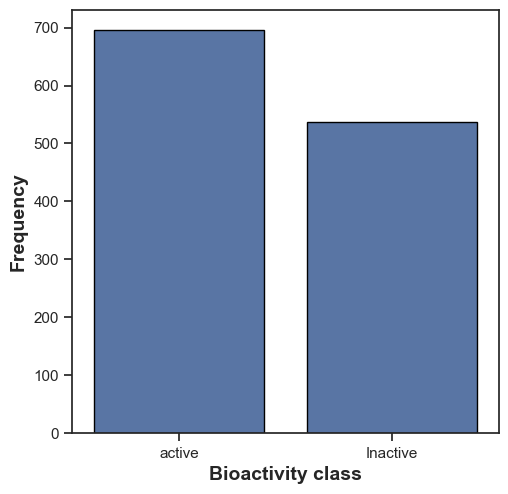

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

x = plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold', )
y = plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.savefig('plot_bioactivity_class.pdf')

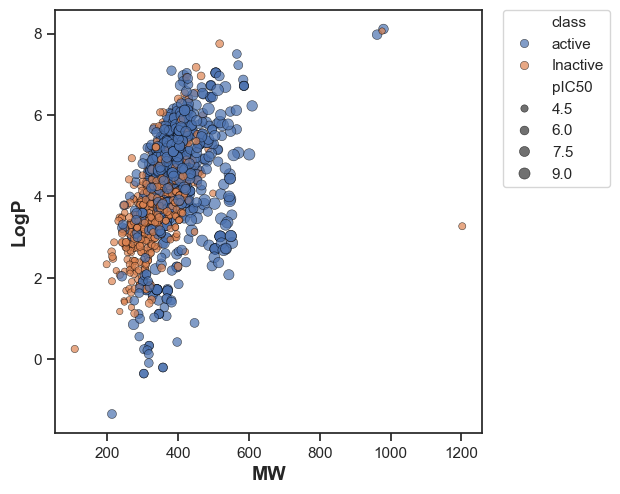

In [57]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

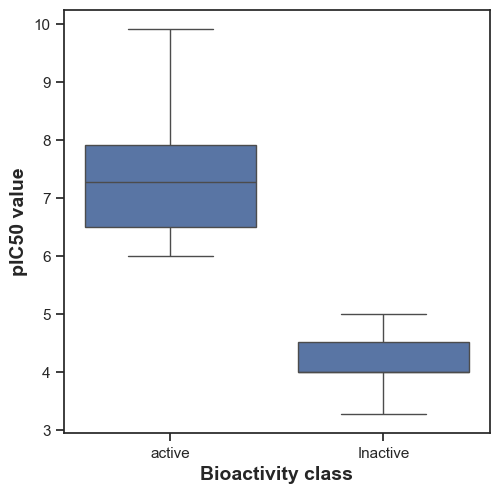

In [58]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

### Significance of pIC50 Values

The pIC50 value is a measure of the potency of a substance in inhibiting a specific biological or biochemical function. This value is the negative logarithm of the IC50 value, which is the concentration of a drug at which it inhibits a biological process by 50%. In the context of drug discovery, a high pIC50 value indicates a more potent inhibitor because it corresponds to a lower IC50 value, meaning that a smaller concentration of the drug is required to achieve the desired inhibitory effect.

A low pIC50 value suggests that higher concentrations of the drug are needed for the same effect, which may not be desirable in a therapeutic context. Therefore, when comparing compounds, those with higher pIC50 values are generally more favorable as potential drug candidates, assuming other pharmacological properties such as selectivity and toxicity are acceptable.

### Importance of the Mann-Whitney U Test

The Mann-Whitney U test is a non-parametric statistical test that is used to compare differences between two independent groups when the dependent variable is either ordinal or continuous, but not normally distributed. It is the non-parametric alternative to the t-test for independent samples.

In the field of data analysis, especially in biomedical research, the Mann-Whitney U test is important because it does not assume a normal distribution of the data, making it more robust in situations where the data may be skewed or have outliers. This test helps to determine if there are statistically significant differences between two groups, which can be crucial in the early stages of drug development to compare the effects of different compounds or treatments.

By using the Mann-Whitney U test, researchers can make informed decisions about which compounds to pursue further, based on evidence that there is a real difference in their effects. This can save time and resources by focusing on the most promising candidates. Additionally, the test can be used to analyze a wide range of data types, which adds to its versatility and utility in research.

In [63]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]
    
  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'Inactive']
  inactive = inactive[descriptor]
# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [64]:
mannwhitney('pIC50')

Descriptor  Statistics  ...  alpha                      Interpretation
0      pIC50    373752.0  ...   0.05  Different distribution (reject H0)

[1 rows x 5 columns]

MW


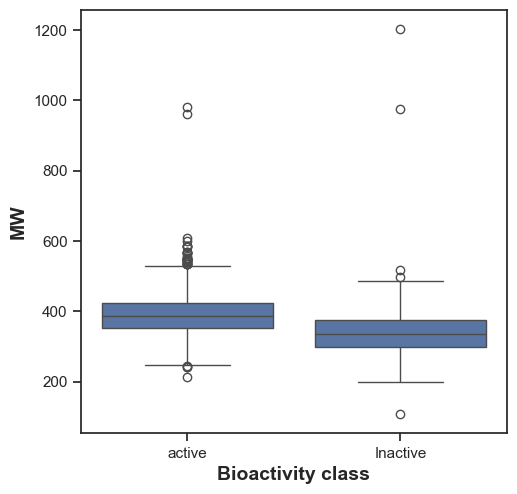

In [65]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [67]:
mannwhitney('MW')

Descriptor  Statistics  ...  alpha                      Interpretation
0         MW    279078.5  ...   0.05  Different distribution (reject H0)

[1 rows x 5 columns]

LogP

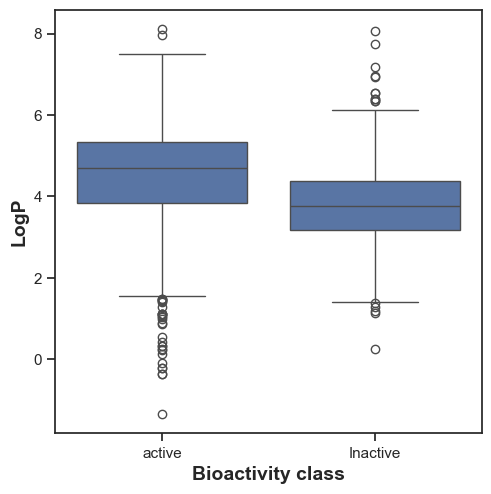

In [68]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [69]:
mannwhitney('LogP')

Descriptor  Statistics  ...  alpha                      Interpretation
0       LogP    258686.0  ...   0.05  Different distribution (reject H0)

[1 rows x 5 columns]

NumHDonors


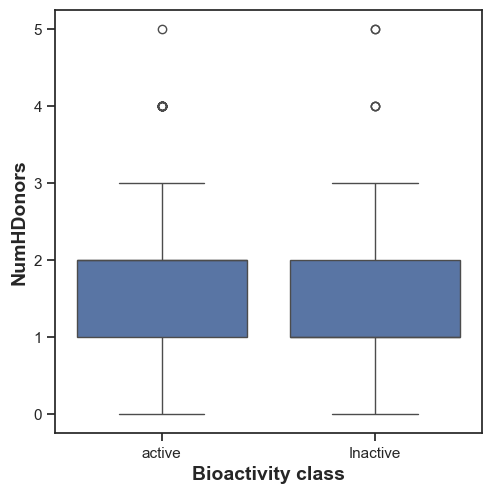

In [70]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [71]:
mannwhitney('NumHDonors')

Descriptor  Statistics  ...  alpha                      Interpretation
0  NumHDonors    222674.5  ...   0.05  Different distribution (reject H0)

[1 rows x 5 columns]

NumHAcceptors

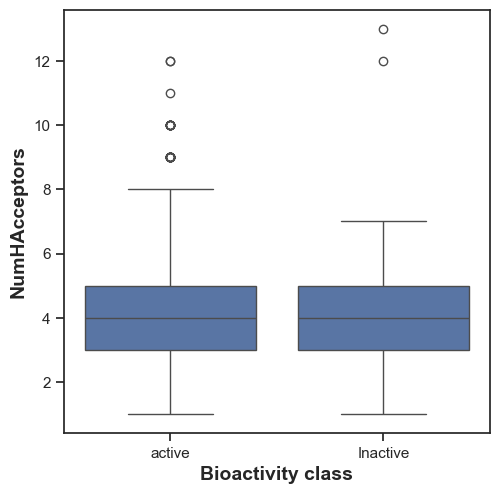

In [72]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [73]:
mannwhitney('NumHAcceptors')

Descriptor  Statistics  ...  alpha                      Interpretation
0  NumHAcceptors    198996.0  ...   0.05  Different distribution (reject H0)

[1 rows x 5 columns]

In [74]:
! zip -r results.zip . -i *.csv *.pdf

  adding: Human DiHydroOrotate DeHydrogenase_05_bioactivity_data_2class_pIC50.csv (deflated 77%)
  adding: Human DiHydroOrotate DeHydrogenase_04_bioactivity_data_3class_pIC50.csv (deflated 78%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: Human DiHydroOrotate DeHydrogenase_02_bioactivity_data_preprocessed.csv (deflated 82%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: plot_NumHAcceptors.pdf (deflated 39%)
  adding: plot_MW.pdf (deflated 39%)
  adding: Human DiHydroOrotate DeHydrogenase_03_bioactivity_data_curated.csv (deflated 83%)
  adding: Human DiHydroOrotate DeHydrogenase_01_bioactivity_data_raw.csv (deflated 93%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_MW_vs_LogP.pdf (deflated 4%)
  adding: plot_NumHDonors.pdf (deflated 39%)
  adding: plot_ic

#Descriptor Calculation and Dataset Preparation

In [75]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-02-17 13:57:37--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-02-17 13:57:37--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.06s   

2024-02-17 13:57:37 (384 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-02-17 13:57:38--  https://github

In [76]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [ ]:
import pandas as pd

In [77]:
df3 = pd.read_csv(nam + '_04_bioactivity_data_3class_pIC50.csv')

In [83]:
df3

Unnamed: 0 molecule_chembl_id  ... NumHAcceptors     pIC50
0              0       CHEMBL154151  ...           3.0  7.301030
1              1       CHEMBL157004  ...           3.0  6.075721
2              2       CHEMBL348270  ...           2.0  6.387216
3              3       CHEMBL345464  ...           3.0  7.698970
4              4       CHEMBL154214  ...           3.0  5.244125
...          ...                ...  ...           ...       ...
1483        1483      CHEMBL5186161  ...          10.0  9.251812
1484        1484      CHEMBL5193821  ...          10.0  9.522879
1485        1485      CHEMBL5201357  ...          10.0  8.000000
1486        1486      CHEMBL5197655  ...          10.0  7.958607
1487        1487      CHEMBL5206111  ...          10.0  9.096910

[1488 rows x 9 columns]

In [84]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [85]:
! cat molecule.smi | head -5

CN(C)c1ccc(-c2ccc(NC(=O)C3=C(C(=O)O)CCC3)cc2Cl)cc1	CHEMBL154151
O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)cc2C(F)(F)F)CCC1	CHEMBL157004
O=C(O)C1=C(C(=O)Nc2ccc(-c3ccccc3)cc2)CCC1	CHEMBL348270
O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)c(Cl)c2)CCC1	CHEMBL345464
O=C(O)C1=C(C(=O)Nc2ccc(-c3ccc(OC(F)(F)F)cc3)cc2F)CCC1	CHEMBL154214
cat: write error: Broken pipe


In [86]:
! cat molecule.smi | wc -l

1488


Calculate fingerprint descriptors

In [87]:
! bash padel.sh

Processing CHEMBL154151 in molecule.smi (1/1488). 
Processing CHEMBL157004 in molecule.smi (2/1488). 
Processing CHEMBL345464 in molecule.smi (4/1488). Average speed: 1.36 s/mol.
Processing CHEMBL348270 in molecule.smi (3/1488). Average speed: 2.72 s/mol.
Processing CHEMBL154214 in molecule.smi (5/1488). Average speed: 1.01 s/mol.
Processing CHEMBL157105 in molecule.smi (6/1488). Average speed: 0.76 s/mol.
Processing CHEMBL345701 in molecule.smi (7/1488). Average speed: 0.66 s/mol.
Processing CHEMBL358435 in molecule.smi (8/1488). Average speed: 0.55 s/mol.
Processing CHEMBL345652 in molecule.smi (9/1488). Average speed: 0.51 s/mol.
Processing CHEMBL345147 in molecule.smi (10/1488). Average speed: 0.45 s/mol.
Processing CHEMBL155597 in molecule.smi (11/1488). Average speed: 0.42 s/mol.
Processing CHEMBL349577 in molecule.smi (12/1488). Average speed: 0.38 s/mol.
Processing CHEMBL154513 in molecule.smi (13/1488). Average speed: 0.37 s/mol.
Processing CHEMBL157164 in molecule.smi (14/148

In [88]:
! ls -l

total 36692
-rw-r--r-- 1 repl repl  6277128 Feb 17 14:04  Data_computational_drug_Bioactivity_data.ipynb
-rw-r--r-- 1 repl repl  2656725 Feb 17 14:03  descriptors_output.csv
-rw-r--r-- 1 repl repl  1218397 Feb 17 13:30 'Human DiHydroOrotate DeHydrogenase_01_bioactivity_data_raw.csv'
-rw-r--r-- 1 repl repl   102844 Feb 17 13:31 'Human DiHydroOrotate DeHydrogenase_02_bioactivity_data_preprocessed.csv'
-rw-r--r-- 1 repl repl   115870 Feb 17 13:33 'Human DiHydroOrotate DeHydrogenase_03_bioactivity_data_curated.csv'
-rw-r--r-- 1 repl repl   197361 Feb 17 13:42 'Human DiHydroOrotate DeHydrogenase_04_bioactivity_data_3class_pIC50.csv'
-rw-r--r-- 1 repl repl   161583 Feb 17 13:42 'Human DiHydroOrotate DeHydrogenase_05_bioactivity_data_2class_pIC50.csv'
drwxr-xr-x 3 repl repl     6144 Feb 17 13:58  __MACOSX
-rw-r--r-- 1 repl repl      125 Feb 17 13:54  mannwhitneyu_LogP.csv
-rw-r--r-- 1 repl repl      122 Feb 17 13:54  mannwhitneyu_MW.csv
-rw-r--r-- 1 repl repl      131 Feb 17 13:55  mannwhitne

In [89]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X = df3_X.drop('Name',axis=1)

In [91]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(df3_X)
df3_X.head(5)

PubchemFP0  PubchemFP1  PubchemFP2  ...  PubchemFP878  PubchemFP879  PubchemFP880
0           1           1           0  ...             0             0             0
1           1           1           1  ...             0             0             0
2           1           1           0  ...             0             0             0
3           1           1           1  ...             0             0             0
4           1           1           0  ...             0             0             0

[5 rows x 881 columns]

In [92]:

df3_X.head(5)

PubchemFP0  PubchemFP1  PubchemFP2  ...  PubchemFP878  PubchemFP879  PubchemFP880
0           1           1           0  ...             0             0             0
1           1           1           1  ...             0             0             0
2           1           1           0  ...             0             0             0
3           1           1           1  ...             0             0             0
4           1           1           0  ...             0             0             0

[5 rows x 881 columns]

In [93]:
df3_Y = df3['pIC50']
df3_Y

0       7.301030
1       6.075721
2       6.387216
3       7.698970
4       5.244125
          ...   
1483    9.251812
1484    9.522879
1485    8.000000
1486    7.958607
1487    9.096910
Name: pIC50, Length: 1488, dtype: float64

Combine x and y

In [94]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

PubchemFP0  PubchemFP1  PubchemFP2  ...  PubchemFP879  PubchemFP880     pIC50
0              1           1           0  ...             0             0  7.301030
1              1           1           1  ...             0             0  6.075721
2              1           1           0  ...             0             0  6.387216
3              1           1           1  ...             0             0  7.698970
4              1           1           0  ...             0             0  5.244125
...          ...         ...         ...  ...           ...           ...       ...
1483           1           1           1  ...             0             0  9.251812
1484           1           1           1  ...             0             0  9.522879
1485           1           1           1  ...             0             0  8.000000
1486           1           1           1  ...             0             0  7.958607
1487           1           1           1  ...             0             0  9.096910

[1488 rows x 882 columns]

In [95]:
dataset3.to_csv( nam + '_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

Regression models, particularly those employing Random Forest algorithms, play a pivotal role in the drug discovery process, especially when identifying potential drug candidates for specific targets like Human Dihydroorotate Dehydrogenase (DHODH). The significance of these models in drug discovery can be outlined as follows:

1. **Predictive Accuracy**: Random Forest is known for its high accuracy in regression tasks. It can handle complex datasets with multiple input features, making it ideal for predicting the biological activity (e.g., pIC50 values) of chemical compounds against a target like DHODH. This predictive capability is crucial for identifying compounds with the desired therapeutic effects.

2. **Handling Multidimensional Data**: Drug discovery datasets often contain a vast array of features (e.g., molecular descriptors and fingerprints) that describe the chemical properties of compounds. Random Forest can efficiently process these multidimensional datasets, identifying the most relevant features that contribute to a compound's activity against the target.

3. **Robustness to Overfitting**: The ensemble nature of Random Forest, where multiple decision trees are combined, helps in reducing the risk of overfitting. This is particularly important in drug discovery, where models need to generalize well to unseen data to reliably predict the activity of new compounds.

4. **Importance of Features**: Random Forest models can provide insights into the importance of different features (e.g., molecular descriptors) in predicting the activity of compounds. This information can guide medicinal chemists in designing new drug candidates with optimized properties for inhibiting DHODH.

5. **Versatility in Data Types**: These models can handle various types of data, including continuous and categorical variables, without the need for extensive preprocessing. This flexibility is beneficial in drug discovery, where datasets can vary widely in format and composition.

6. **Speed and Scalability**: Random Forest models can be trained relatively quickly and are scalable to large datasets, an essential feature given the vast number of compounds that need to be screened in the early stages of drug discovery.

In summary, the application of Random Forest regression models in drug discovery for targets like Human DHODH enables the efficient and accurate identification of promising drug candidates. These models facilitate the exploration of vast chemical spaces and the optimization of compound properties, accelerating the development of new therapeutics.

In [96]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [97]:
df = pd.read_csv(nam + '_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')


In [98]:
X = df.drop('pIC50', axis=1)

X.head(5)

PubchemFP0  PubchemFP1  PubchemFP2  ...  PubchemFP878  PubchemFP879  PubchemFP880
0           1           1           0  ...             0             0             0
1           1           1           1  ...             0             0             0
2           1           1           0  ...             0             0             0
3           1           1           1  ...             0             0             0
4           1           1           0  ...             0             0             0

[5 rows x 881 columns]

In [99]:
df.pIC50.to_csv(nam + "_Predicted_pIC50_values.csv", index=False)
Y = df.pIC50
Y

0       7.301030
1       6.075721
2       6.387216
3       7.698970
4       5.244125
          ...   
1483    9.251812
1484    9.522879
1485    8.000000
1486    7.958607
1487    9.096910
Name: pIC50, Length: 1488, dtype: float64

In [100]:
X.shape

(1488, 881)

In [101]:
Y.shape

(1488,)

In [102]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [103]:
X.shape

(1488, 169)

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [105]:
X_train.shape, Y_train.shape

((1190, 169), (1190,))

In [106]:
X_test.shape, Y_test.shape

((298, 169), (298,))

In [107]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.7412945797041872

In [108]:
Y_pred = model.predict(X_test)

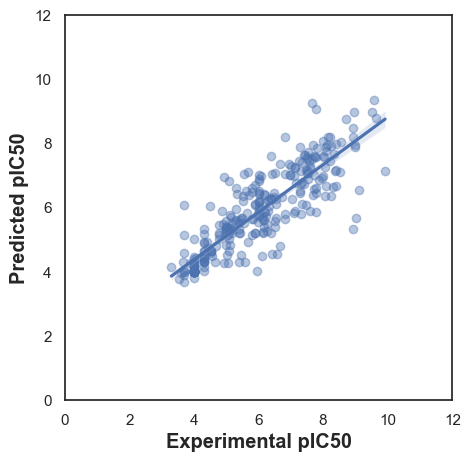

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()